<a href="https://colab.research.google.com/github/xtianu/CV_Tirana/blob/main/M4_Deep%20Learning/Example_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE 4: DEEP LEARNING
Christian Mata, PhD

# **EXAMPLE**: Classification

#1. Load database

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

class label for image 12131 is 9


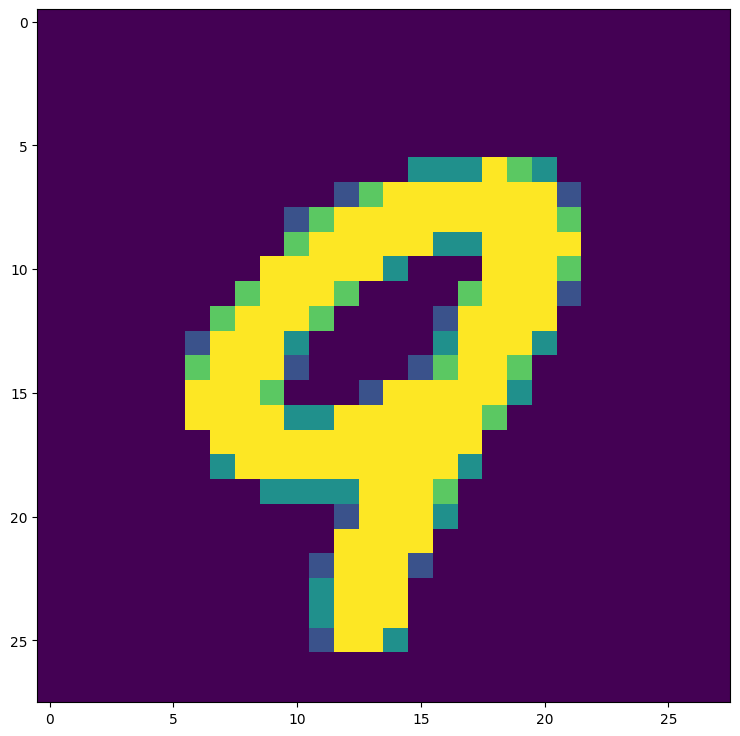

In [3]:
import matplotlib.pylab as plt

isel = 12131
figure = plt.figure(figsize=(9,9))
plt.imshow(x_train[isel])
print('class label for image {} is {}'.format(isel,y_train[isel]))

Visualitzar primera imatge de cada classe

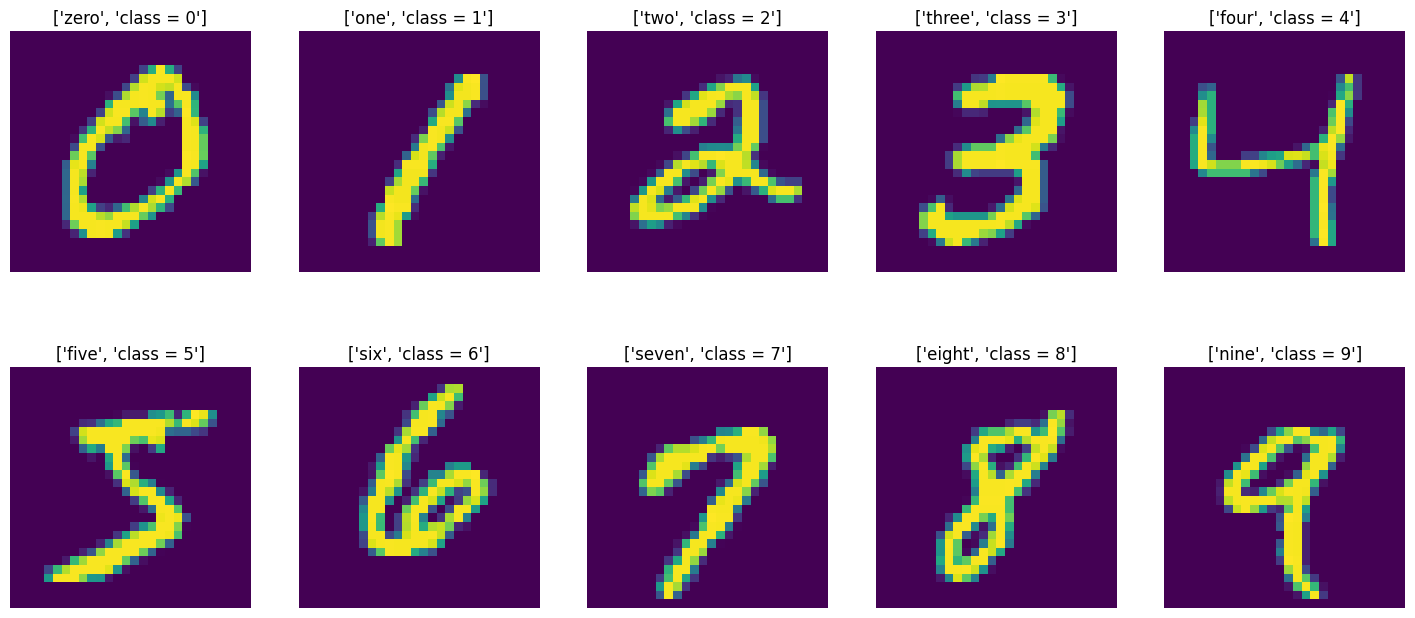

In [4]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_train==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_train[ind[0][0]].squeeze())
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')

# 2. Preprocess data

Normalitzar imatges

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Convertir etiquetes de classe a variables categòriques (one-hot)

In [7]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [8]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# 3. Buid and train DL model

Define the DL architecture

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ features (Flatten)              │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size =256
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#model.save(folder_data + '/model_saved') # save trained model

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 38s 173ms/step - accuracy: 0.6854 - loss: 1.0478 - val_accuracy: 0.9725 - val_loss: 0.1049
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 40s 169ms/step - accuracy: 0.9540 - loss: 0.1497 - val_accuracy: 0.9820 - val_loss: 0.0708
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.9684 - loss: 0.1056 - val_accuracy: 0.9840 - val_loss: 0.0593
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 39s 166ms/step - accuracy: 0.9731 - loss: 0.0860 - val_accuracy: 0.9868 - val_loss: 0.0496
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9770 - loss: 0.0718 - val_accuracy: 0.9880 - val_loss: 0.0441


#4. Evaluate the classifier with the test data

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

score = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

y_test_pred_DL_full = np.argmax(model.predict(x_test),axis=1) # convert back from one-hot categorical encoding to integers
print(classification_report(y_test, y_test_pred_DL_full, target_names=label_names))
print(confusion_matrix(y_test, y_test_pred_DL_full))

Test loss: 0.04389730095863342
Test accuracy: 0.9858999848365784
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

        zero       0.97      1.00      0.98       980
         one       0.99      1.00      0.99      1135
         two       0.98      0.99      0.99      1032
       three       0.99      0.98      0.99      1010
        four       0.99      0.99      0.99       982
        five       0.99      0.99      0.99       892
         six       0.99      0.98      0.99       958
       seven       0.98      0.98      0.98      1028
       eight       0.99      0.98      0.98       974
        nine       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1130    2    1    0    0    2    0    0    0]
 [   2    2 1022    0    1   

Inspecting the missclassification


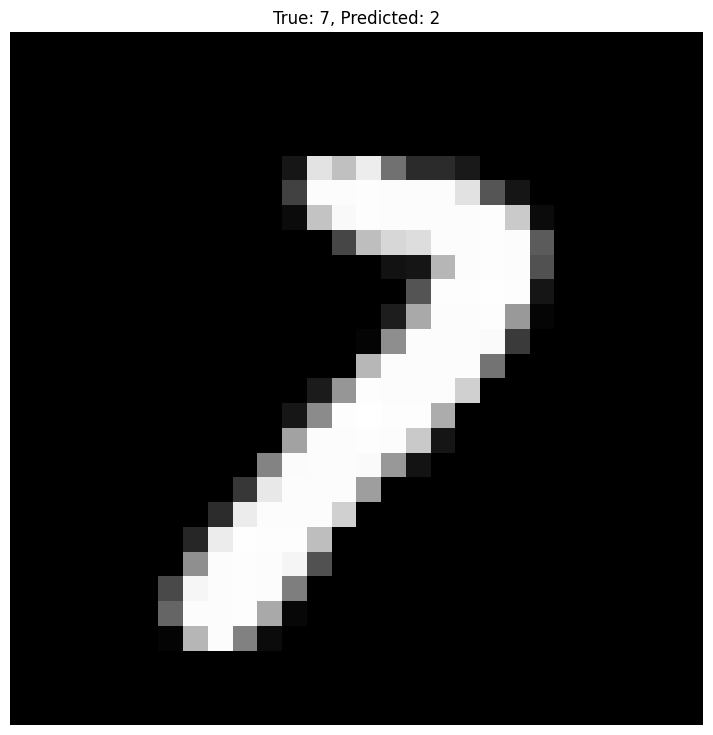

True label for image 1206 is 7
Predicted label for image 1206 is 2


In [ ]:
isel = np.where((y_test==7)&(y_test_pred_DL_full==2))[0]  # extract index array

if len(isel) > 0:
    idx = isel[0]  # select the first mismatch
    plt.figure(figsize=(9, 9))
    plt.imshow(np.squeeze(x_test[idx]), cmap='gray')  # Add cmap if grayscale
    plt.title(f"True: {y_test[idx]}, Predicted: {y_test_pred_DL_full[idx]}")
    plt.axis('off')
    plt.show()

    print(f'True label for image {idx} is {y_test[idx]}')
    print(f'Predicted label for image {idx} is {y_test_pred_DL_full[idx]}')
else:
    print("No misclassified samples found for the specified condition.") #Update the message

Looking 7's that seems 2's:

In [ ]:
isel = np.where((y_test==7)&(y_test_pred_DL_full==2))
np.shape(isel)
isel = np.squeeze(isel)

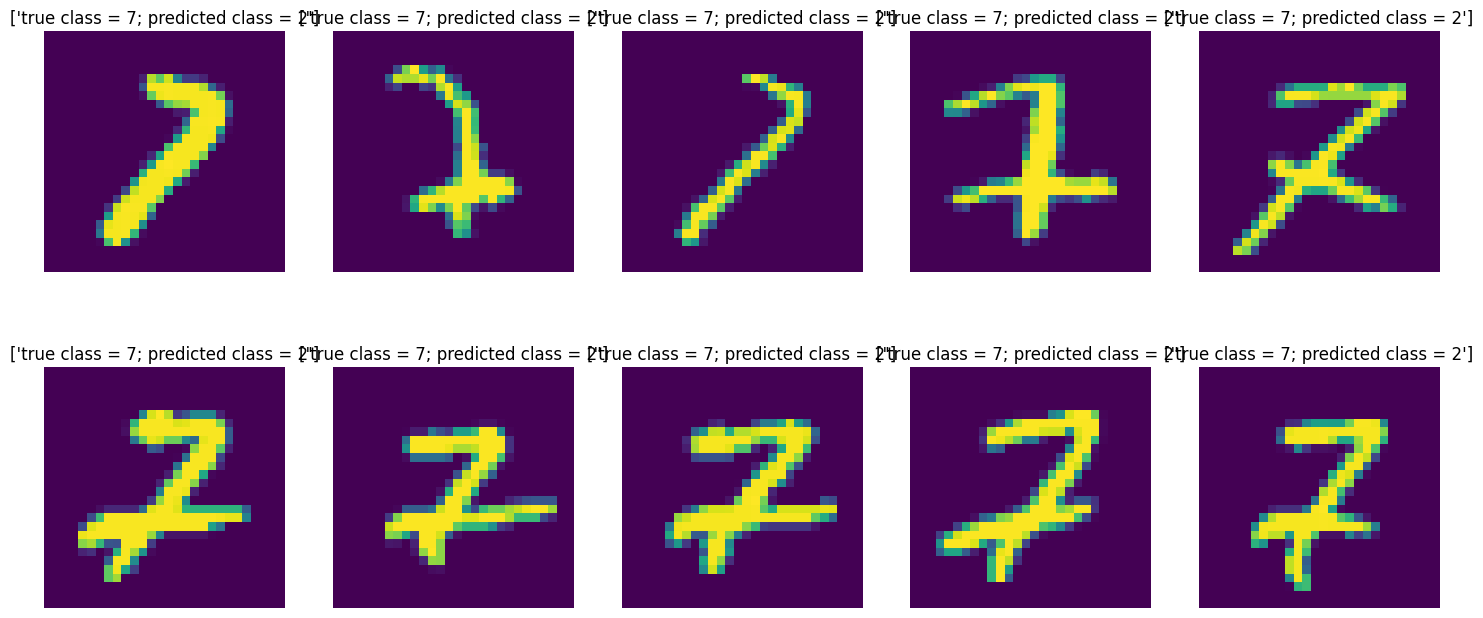

In [ ]:
fig = plt.figure(figsize=(18, 8))

cnt = 0
for k in isel:
    cnt += 1
    ax = fig.add_subplot(2, 5,cnt)
    ax.imshow(np.squeeze(x_test[k]))
    ax.set_title(['true class = {}; predicted class = {}'.format(y_test[k],y_test_pred_DL_full[k])])
    ax.axis('off')